# Figure 3c

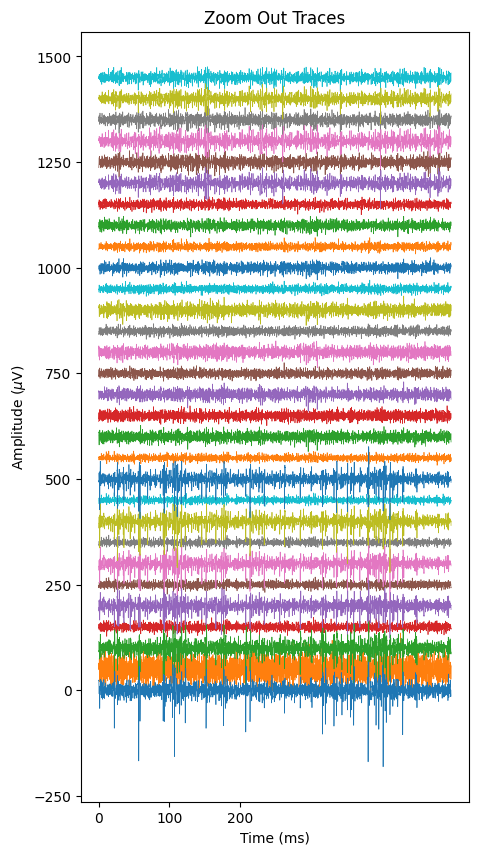

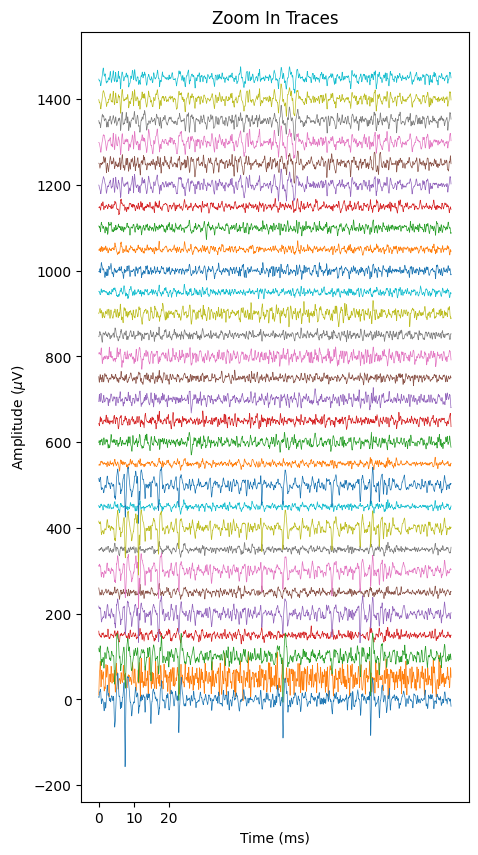

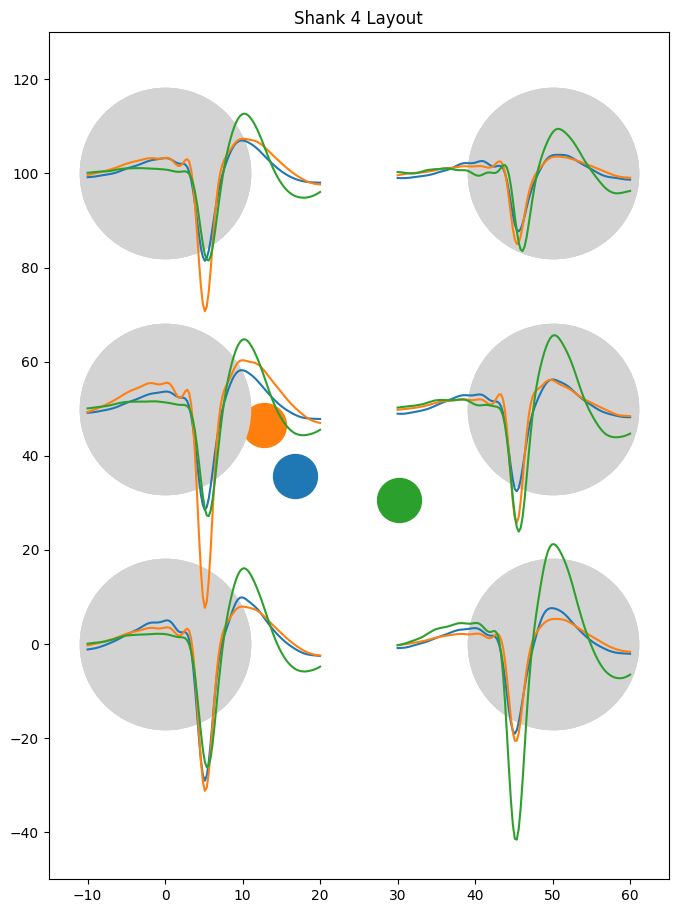

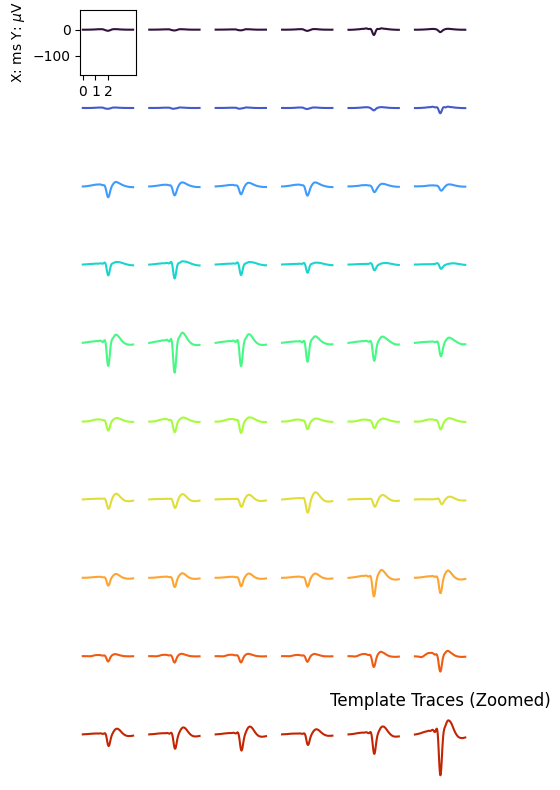

In [1]:
# Figure 3ci, ii, iii, iv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Set up folder paths**
source_data_dir = "../source data/Figure 3"  # Current directory (source_data)
figure_folder = "./Figure_2o-q"  # Parent directory for saving figures
plot_format = 'pdf'

# Ensure the figures directory exists
os.makedirs(figure_folder, exist_ok=True)

################################################################################

### **1️. Load and plot Zoom Out data (Figure 3c i)**
data = np.load(os.path.join(source_data_dir, "trace_zoom_out.npz"), allow_pickle=True)
traces = data['traces']  
channel_ids = data['channel_ids']
trace_gap = float(data['trace_gap'])  
sampling_frequency = float(data['sampling_frequency'])  
n_frames_per_ms = sampling_frequency / 1000

plt.figure(figsize=(5, 10))
for shank in range(len(traces)):
    for trace_index, trace in enumerate(traces[shank]):
        plt.plot(trace + trace_gap * channel_ids[shank][trace_index], linewidth=0.5,
                 color=plt.cm.tab10(channel_ids[shank][trace_index] % 10))

plt.xticks([0, n_frames_per_ms * 100, n_frames_per_ms * 200], [0, 100, 200])
plt.xlabel('Time (ms)')
plt.ylabel(r'Amplitude ($\mu$V)')
plt.title("Zoom Out Traces")
# plt.savefig(os.path.join(figure_folder, f'Figure_3c_i_trace_zoom_out.{plot_format}'))
plt.show()
plt.close()

################################################################################

### **2️. Load and plot Zoom In data ((Figure 3c ii)**
data = np.load(os.path.join(source_data_dir, "trace_zoom_in.npz"), allow_pickle=True)
traces = data['traces']  

plt.figure(figsize=(5, 10))
for shank in range(len(traces)):
    for trace_index, trace in enumerate(traces[shank]):
        plt.plot(trace + trace_gap * channel_ids[shank][trace_index], linewidth=0.5,
                 color=plt.cm.tab10(channel_ids[shank][trace_index] % 10))

plt.xticks([0, n_frames_per_ms * 10, n_frames_per_ms * 20], [0, 10, 20])
plt.xlabel('Time (ms)')
plt.ylabel(r'Amplitude ($\mu$V)')
plt.title("Zoom In Traces")
# plt.savefig(os.path.join(figure_folder, f'Figure_3c_ii_trace_zoom_in.{plot_format}'))
plt.show()
plt.close()

################################################################################

### **3️. Load and plot Locations and Templates (Figure 3c iii)**
npz_file = np.load(os.path.join(source_data_dir, "locations_shank4.npz"), allow_pickle=True)

# Convert back to DataFrame
locations = pd.DataFrame({key: npz_file[key] for key in ['shank', 'unit_id', 'lapse', 'x', 'y', 
                                                          'drift_x', 'drift_y', 'abs_drift_x', 'abs_drift_y']})

plt.figure(figsize=(8, 11))
palette = sns.color_palette("tab10")
plotted_shanks = set()

for i, row in locations.iterrows():
    color = palette[i % len(palette)]
    probe_locations_key = f"probe_locations_{int(row['shank'])}_{int(row['unit_id'])}"
    if probe_locations_key in npz_file.files and probe_locations_key not in plotted_shanks:
        probe_locations = npz_file[probe_locations_key]
        plt.scatter(probe_locations[:, 0], probe_locations[:, 1], s=15000, color='lightgray', alpha=1.0)
        plotted_shanks.add(probe_locations_key)

    plt.scatter(row['x'], row['y'], color=color, s=1000, label=f"Lapse {row['lapse']}")

    waveform_key = f"waveform_{int(row['shank'])}_{int(row['unit_id'])}_{int(row['lapse'])}"
    time_points_key = f"time_points_{int(row['shank'])}_{int(row['unit_id'])}_{int(row['lapse'])}"

    if waveform_key in npz_file.files:
        template = npz_file[waveform_key]
        time_points = npz_file[time_points_key]
        for channel_idx, channel_location in enumerate(probe_locations):
            x_offset = 30 if channel_idx >= len(probe_locations) // 2 else -10
            plt.plot(
                time_points + x_offset, 
                template[:, channel_idx] + channel_location[1],
                color=color,
                alpha=1.0,
                linewidth=1.5
            )

plt.xlim(-15, 65)
plt.ylim(-50, 130)
plt.title(f'Shank 4 Layout')
# plt.savefig(os.path.join(figure_folder, f'Figure_3c_iii_recreated_locations_shank4.{plot_format}'))
plt.show()
plt.close()

################################################################################

### **4️. Load and plot Template data (Figure 3c iv)**
data = np.load(os.path.join(source_data_dir, "trace_templates.npz"), allow_pickle=True)
zoomed_templates = data['templates']  

plt.figure(figsize=(5, 10))
ncols = 6  
nrows = len(zoomed_templates)  

for unit_index in range(nrows):
    for channel_index in range(ncols):
        ax = plt.subplot(nrows, ncols, unit_index * ncols + channel_index + 1)
        ax.plot(zoomed_templates[unit_index, :, channel_index], color=plt.cm.turbo(unit_index / nrows))
        ax.set_ylim(-175, 75)
        ax.set_axis_off()
        if unit_index == channel_index == 0:
            ax.set_xticks([0, n_frames_per_ms, n_frames_per_ms * 2], [0, 1, 2])
            ax.set_ylabel(r'X: ms Y: $\mu$V')
            ax.set_axis_on()

plt.title("Template Traces (Zoomed)")
# plt.savefig(os.path.join(figure_folder, f'Figure_2o_iv_trace_templates.{plot_format}'))
plt.show()
plt.close()

# Figure 3d-e

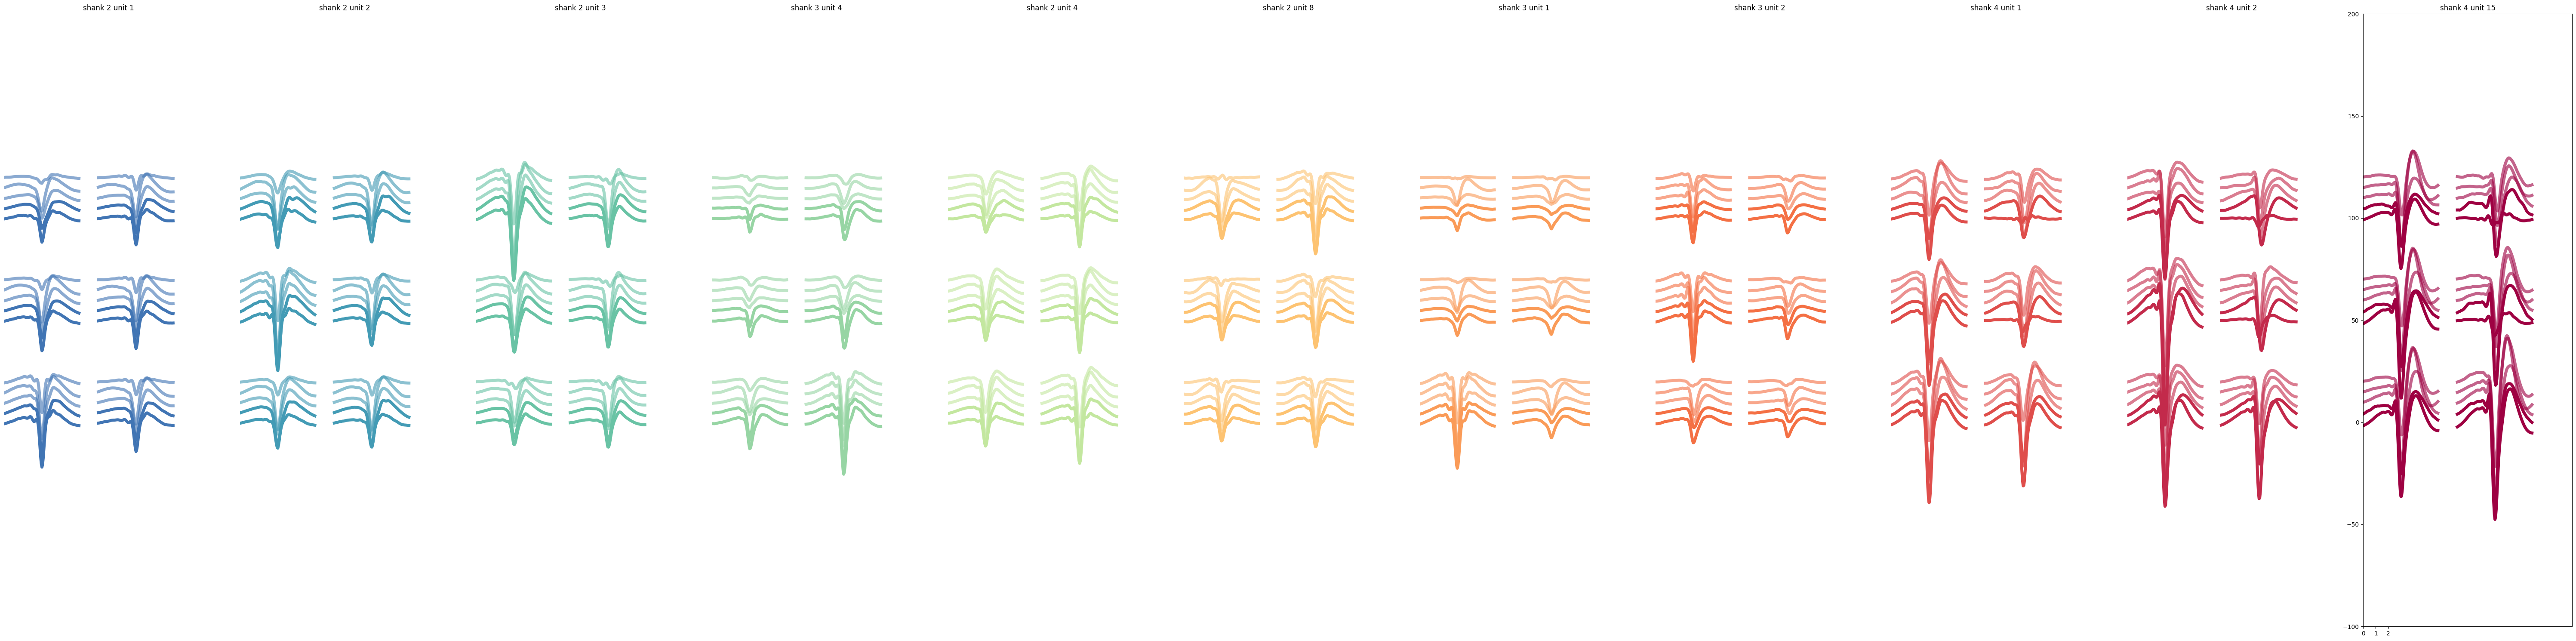

In [2]:
# Figure 3d

import os
import numpy as np
import matplotlib.pyplot as plt

figure_folder = "./Figure_2o-q"

# === Load NPZ Data ===
source_data_dir = "../source data/Figure 3"  
npz_path = os.path.join(source_data_dir, "waveform_data_final.npz")
npz_file = np.load(npz_path, allow_pickle=True)

unit_waveforms = npz_file["unit_waveforms"].item()
unit_segments = npz_file["unit_segments"].item()
unit_lapses = npz_file["unit_lapses"].item()
unit_colors = npz_file["unit_colors"].item()
unit_locations = npz_file["unit_locations"].item()

# === Plot ===
template_gap = 5
fig = plt.figure(figsize=(60, 15))

for unit_index, (unit_key, templates) in enumerate(unit_waveforms.items()):
    shank, unit_id = unit_key.split('_')
    shank = int(shank)
    unit_id = int(unit_id)

    ax = plt.subplot(1, len(unit_waveforms), unit_index + 1)

    sorted_segments = unit_segments[unit_key]
    sorted_lapses = unit_lapses[unit_key]
    unit_color = unit_colors[unit_key]

    max_lapse = max(sorted_lapses) if sorted_lapses else 1

    for idx, (segment, lapse) in enumerate(zip(sorted_segments, sorted_lapses)):
        row = len(sorted_segments) - 1 - idx  # Ensure correct ordering (bottom to top)

        # Adjust transparency
        alpha = max(0, min(0.42 + 0.58 * (lapse / max_lapse), 1))
        gradient_color = (
            unit_color[0],
            unit_color[1],
            unit_color[2],
            alpha
        )

        for channel in range(templates.shape[2]):
            base_x, base_y = {0: (0, 0), 1: (0, 50), 2: (0, 100), 3: (150, 0), 4: (150, 50), 5: (150, 100)}[channel]
            
            ax.plot(np.arange(templates.shape[1]) + base_x, 
                    templates[idx, :, channel] + row * template_gap + base_y, 
                    color=gradient_color,
                    linewidth=5)

    ax.set_axis_off()
    ax.set_ylim(-100, 200)
    ax.set_xlim(0, 333)
    ax.set_title(f'shank {shank} unit {unit_id}')

ax.set_axis_on()
ax.set_xticks([0, 20, 40])
ax.set_xticklabels([0, 1, 2])  
plt.tight_layout()
# plt.savefig(f'{figure_folder}/templates_overtime_final.pdf')
plt.show()
plt.close()


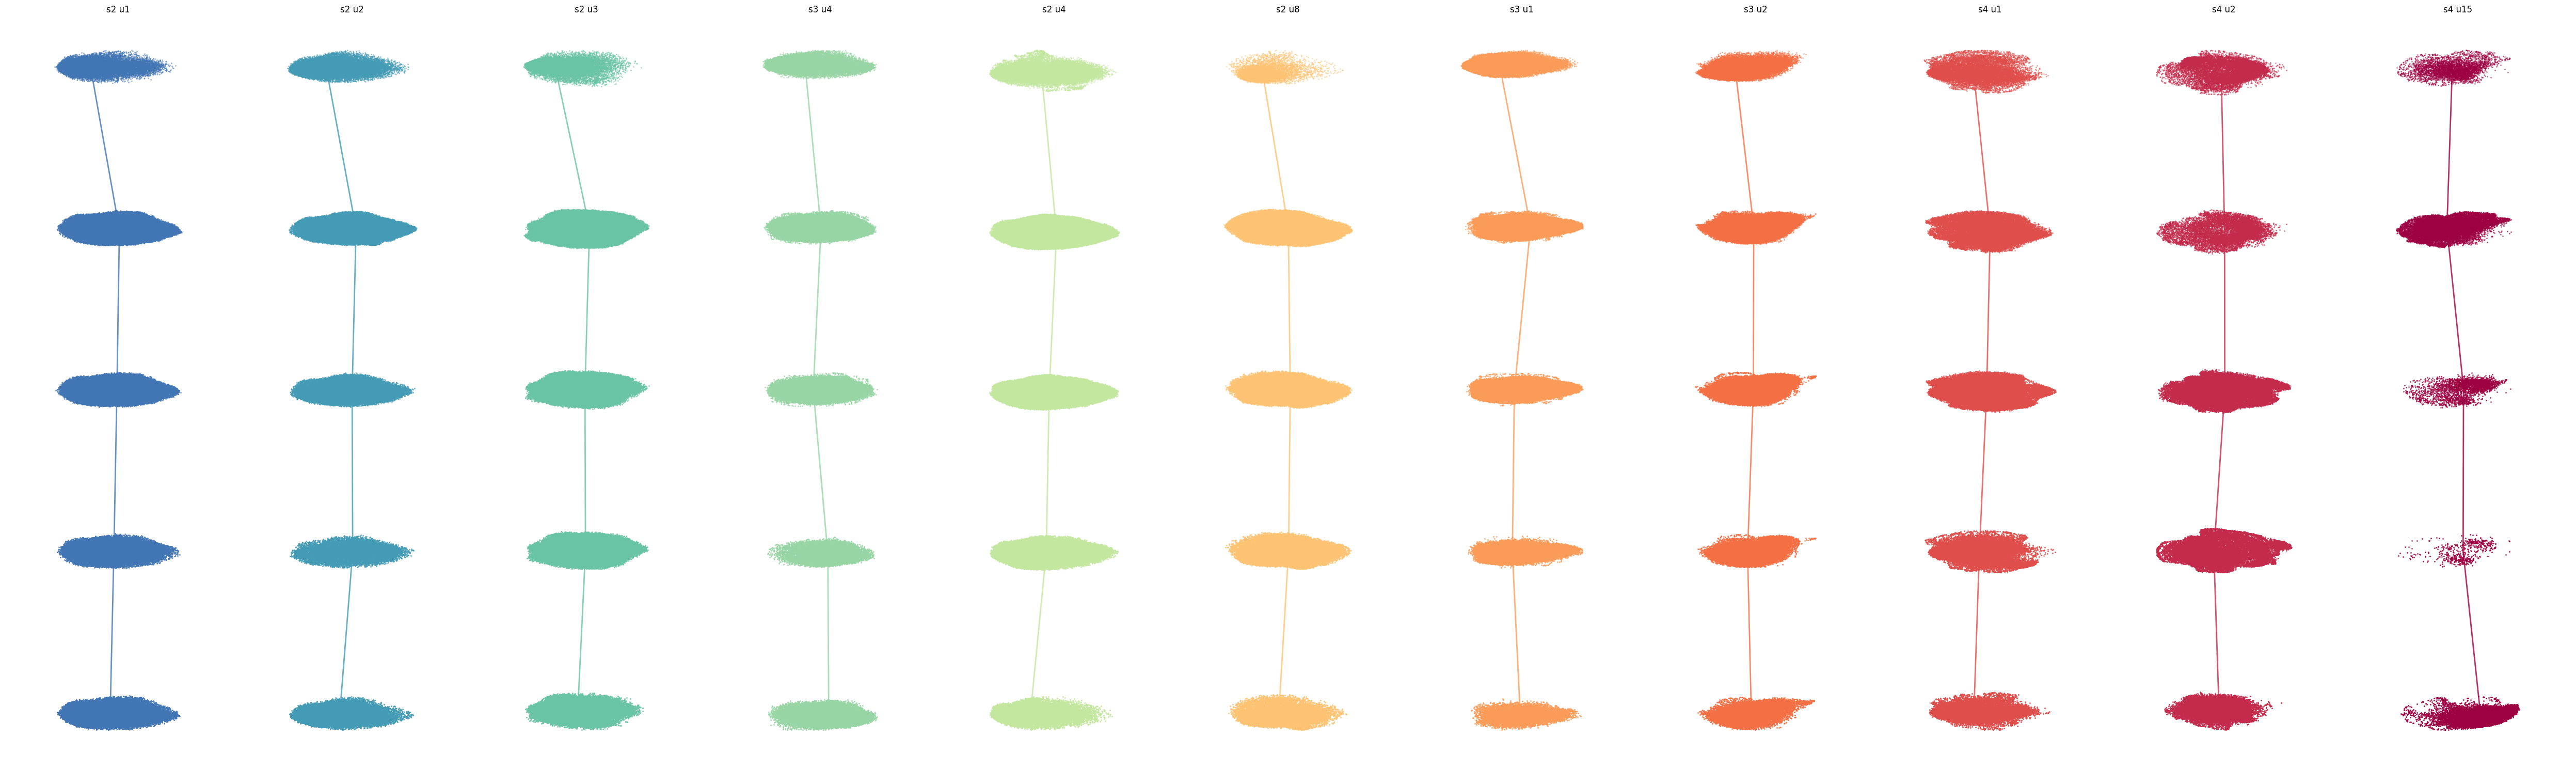

In [4]:
# Figure 3e

import os
import numpy as np
import matplotlib.pyplot as plt

# Load NPZ file
source_data_dir = "../source data/Figure 3"  
figure_folder = "./Figure_2o-q"
npz_path = os.path.join(source_data_dir, "umap_data.npz")
npz_file = np.load(npz_path, allow_pickle=True)

# Extract stored UMAP data
umap_data = npz_file["umap_data"].item()

# === PLOT ===
fig = plt.figure(figsize=(50, 15))
lapse_gap = 50
unit_spacer = 5

spectral_skipped = (0.35, 0.6)
spectral_total = spectral_skipped[0] + (1 - spectral_skipped[1])

for unit_index, (unit_key, data) in enumerate(umap_data.items()):
    shank, unit_id = unit_key.split('_')
    shank = int(shank)
    unit_id = int(unit_id)

    X_umap = data["X_umap"]
    lapses = data["lapses"]

    # Compute base color using Spectral_r colormap
    spectral = (unit_index + 1) / len(umap_data) * spectral_total
    if spectral_skipped[0] <= spectral:
        spectral += (spectral_skipped[1] - spectral_skipped[0])
    base_color = plt.cm.Spectral_r(spectral)

    ax = plt.subplot(1, len(umap_data), unit_index + 1)
    ax.set_title(f's{shank} u{unit_id}')
    ax.set_axis_off()

    means = []
    for lapse in np.unique(lapses):
        lapse_indices = np.where(lapses == lapse)[0]
        row = np.where(np.unique(lapses) == lapse)[0][0]

        # Adjust transparency
        alpha = max(0, min(0.42 + 0.58 * (lapse / np.max(lapses)), 1))
        gradient_color = (base_color[0], base_color[1], base_color[2], alpha)

        ax.scatter(X_umap[lapse_indices, 0], 
                   X_umap[lapse_indices, 1] - row * lapse_gap, 
                   s=1, color=gradient_color, zorder=10)

        means.append([X_umap[lapse_indices, 0].mean(), 
                      X_umap[lapse_indices, 1].mean() - row * lapse_gap])

    means = np.array(means)

    
    if len(means) > 1:
        ax.plot(means[:, 0], means[:, 1], linewidth=2, alpha=0.8, color=base_color, zorder=0)

    ax.set_xlim(X_umap[:, 0].min() - unit_spacer, X_umap[:, 0].max() + unit_spacer)

plt.tight_layout()
# plt.savefig(f'{figure_folder}/umaps_gradients_redrawn.png', dpi=600, transparent=True)
plt.show()
plt.close()